In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18, 'figure.figsize': (25, 10), 'font.family': 'serif', 'text.usetex': True, 'pgf.rcfonts': False})

from indices import *

%load_ext autoreload
%autoreload 2

# Visualizing 2-D Multi-Index Sets

In [2]:
def print_indexset_sparse(l, k, d1, d2) :
    n1 = int(np.ceil(l/k(d1)))
    n2 = int(np.ceil(l/k(d2)))
    arr = [[' ' for _ in range(int(np.ceil(l/k(d2))))] for _ in range(n1)]
    i = indexset_sparse(k, l, cutoff=max(d1,d2)+1)
    arr[0][0] = 'x'
    for idx in i :
        if d1 in idx.keys() and d2 in idx.keys() :  arr[idx[d1]][idx[d2]] = 'x'
        if d1 in idx.keys() : arr[idx[d1]][0] = 'x'
        if d2 in idx.keys() : arr[0][idx[d2]] = 'x'

    for i in range(n1)[::-1]  :
        print('     +' + '---+'*len(arr[i]) + '\n {:3} | '.format(i), end='')
        for j in range(len(arr[i])) :
            print(arr[i][j] + ' | ', end='')
        print()
    print('     +' + '---+'*len(arr[-1]))
    print('       ', end='')
    for i in range(n2) : print(str(i) + '   ', end='')
    print()

In [3]:
def print_indexset_dense(l, k, d1, d2) :
    n1 = int(np.ceil(l/k[d1]))
    n2 = int(np.ceil(l/k[d2]))
    arr = [[' ' for _ in range(int(np.ceil(l/k[d2])))] for _ in range(n1)]
    i = indexset_dense(k, l)
    for idx in i :
        arr[idx[d1]][idx[d2]] = 'x'

    for i in range(n1)[::-1]  :
        print('     +' + '---+'*len(arr[i]) + '\n {:3} | '.format(i), end='')
        for j in range(len(arr[i])) :
            print(arr[i][j] + ' | ', end='')
        print()
    print('     +' + '---+'*len(arr[-1]))
    print('       ', end='')
    for i in range(n2) : print(str(i) + '   ', end='')
    print()

In [4]:
l = 6
print_indexset_sparse(l, lambda j : np.log(j+2)/np.log(2), 0, 1)
print_indexset_dense(l, [np.log(j+2)/np.log(2) for j in range(2)], 0, 1)

     +---+---+---+---+
   5 | x |   |   |   | 
     +---+---+---+---+
   4 | x | x |   |   | 
     +---+---+---+---+
   3 | x | x |   |   | 
     +---+---+---+---+
   2 | x | x | x |   | 
     +---+---+---+---+
   1 | x | x | x | x | 
     +---+---+---+---+
   0 | x | x | x | x | 
     +---+---+---+---+
       0   1   2   3   
     +---+---+---+---+
   5 | x |   |   |   | 
     +---+---+---+---+
   4 | x | x |   |   | 
     +---+---+---+---+
   3 | x | x |   |   | 
     +---+---+---+---+
   2 | x | x | x |   | 
     +---+---+---+---+
   1 | x | x | x | x | 
     +---+---+---+---+
   0 | x | x | x | x | 
     +---+---+---+---+
       0   1   2   3   


# Visualizing Admissible Weight Sequences For Constructing High-dimensional Multi-Index Sets

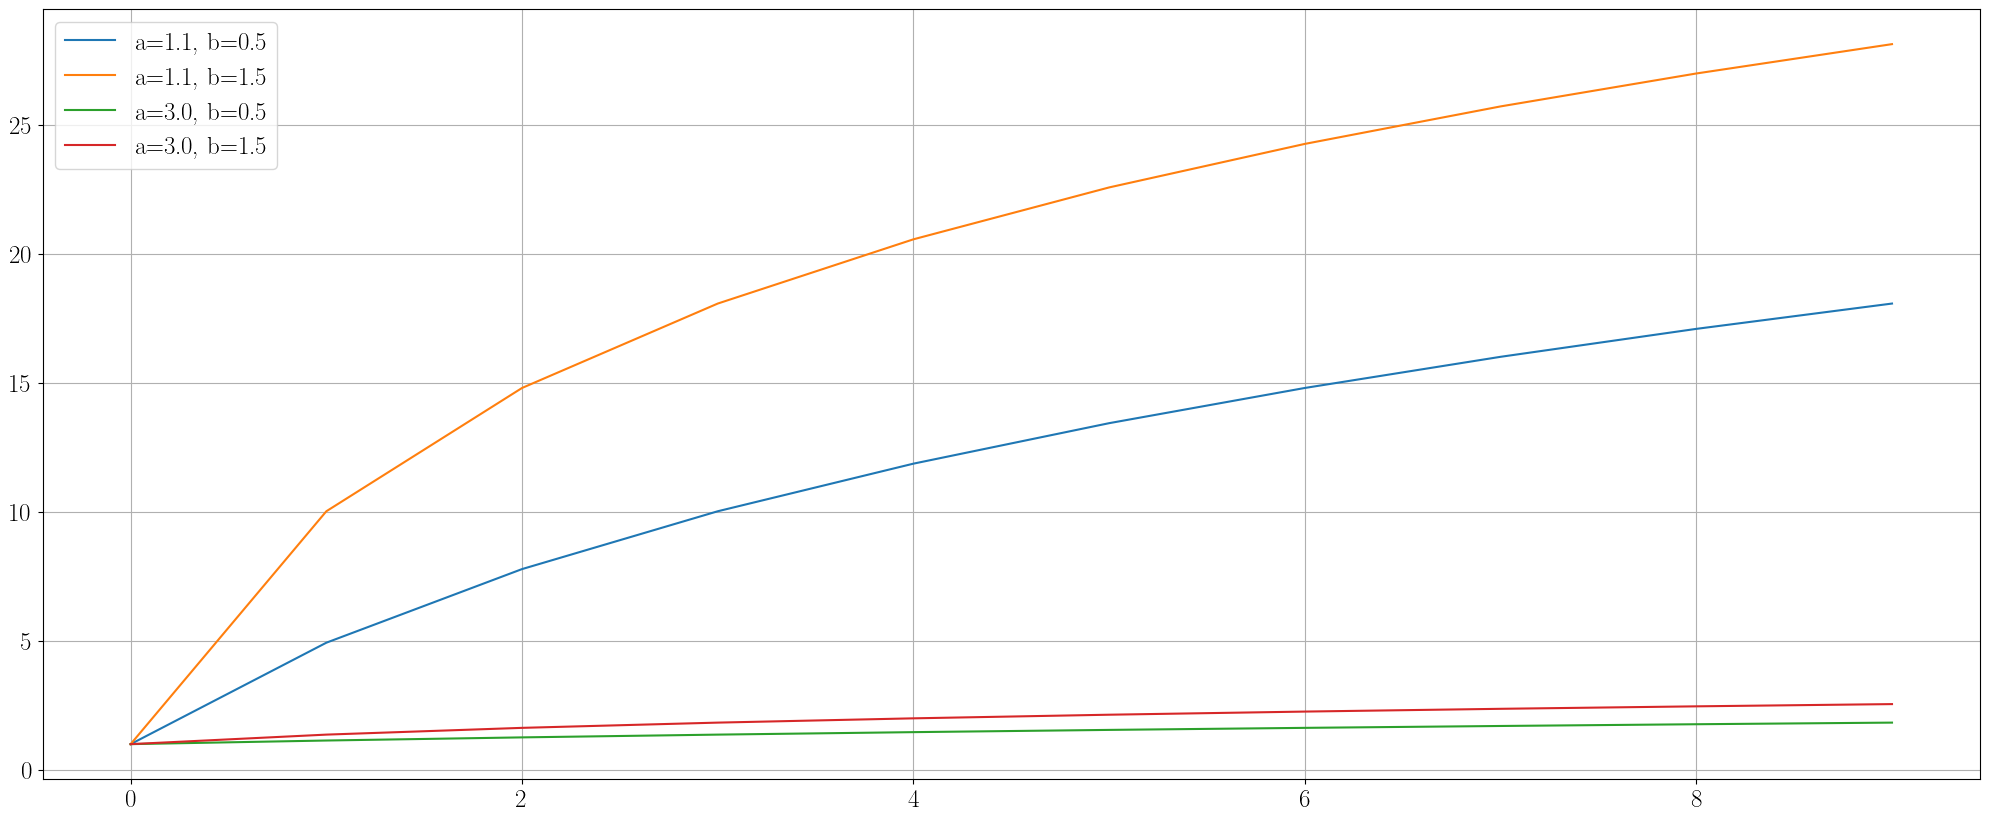

In [5]:
a_list = [1.1, 3.]
b_list = [.5, 1.5]
d = 10
x = np.array([i for i in range(d)])
for a in a_list :
    for b in b_list :
        plt.plot(x, np.log(a + b*x) / np.log(a + b*x[0]), label=f'a={a}, b={b}')
plt.legend(); plt.grid()

# Performance Comparison of Computing Smolyak Coefficients from Sparse or Dense Multi-Index Sets 

In [6]:
d = 345
k = np.array([(i + 2) ** (-2) for i in range(d)])
k = np.log(1 / k / 0.001)
k /= k[0]
kk = lambda j: k[j]
l = 2

isparse = indexset_sparse(kk, l, cutoff=d)
idense = indexset_dense(k, l)

In [7]:
%%prun -s time -l 20
for nu in isparse :
    c = smolyak_coefficient_zeta_sparse(k, l, nu=nu, cutoff=d)

         3898 function calls (3649 primitive calls) in 0.011 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  375/126    0.003    0.000    0.006    0.000 indices.py:47(abs_e_sparse)
      252    0.002    0.000    0.002    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      252    0.001    0.000    0.005    0.000 fromnumeric.py:71(_wrapreduction)
      252    0.001    0.000    0.006    0.000 fromnumeric.py:2177(sum)
      126    0.001    0.000    0.011    0.000 indices.py:64(smolyak_coefficient_zeta_sparse)
     1000    0.001    0.000    0.001    0.000 indices.py:65(<lambda>)
      252    0.001    0.000    0.001    0.000 {built-in method builtins.getattr}
      252    0.000    0.000    0.000    0.000 fromnumeric.py:72(<dictcomp>)
        1    0.000    0.000    0.011    0.011 <string>:1(<module>)
      126    0.000    0.000    0.000    0.000 indices.py:51(<listcomp>)
      252    0.000    0.000    0.000    0.000 {built-in

In [8]:
%%prun -s time -l 20
for nu in idense :
    c = smolyak_coefficient_zeta_dense(k, l, nu=nu)

         239933 function calls (161088 primitive calls) in 3.471 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
78971/126    3.406    0.000    3.443    0.027 indices.py:18(unitball)
    78720    0.020    0.000    0.020    0.000 multiarray.py:741(dot)
    78971    0.016    0.000    0.016    0.000 {built-in method builtins.len}
      377    0.016    0.000    0.016    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      377    0.003    0.000    0.021    0.000 fromnumeric.py:71(_wrapreduction)
      377    0.002    0.000    0.024    0.000 fromnumeric.py:2177(sum)
      126    0.002    0.000    0.023    0.000 indices.py:29(<listcomp>)
      377    0.001    0.000    0.001    0.000 {built-in method builtins.getattr}
      126    0.001    0.000    3.470    0.028 indices.py:28(smolyak_coefficient_zeta_dense)
      377    0.001    0.000    0.001    0.000 fromnumeric.py:72(<dictcomp>)
        1    0.001    0.001    3.471    3.471 <

In [22]:
d = 3
k = np.array([(i + 2) ** (-2) for i in range(d)])
k = np.log(1 / k / 0.001)
k /= k[0]
kk = lambda j: k[j]
l = 2

isparse = indexset_sparse(kk, l, cutoff=d)
idense = indexset_dense(k, l)

In [25]:
for nu in isparse :
    nu_dense = sparse_index_to_dense(nu, cutoff=d)
    assert nu_dense in idense, nu_dense

for nu in idense :
    nu_sparse = dense_index_to_sparse(nu)
    assert nu_sparse in isparse, nu_sparse

In [18]:
idense

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 0, 0)]

In [15]:
(1,2) + (3,) + ()

(1, 2, 3)

In [16]:
()

()